## Studying drkN SH3 domain using IDPET package 

In this Jupyter notebook, we will demonstrate how the IDPET package can enhance the analysis of conformational ensembles of disordered proteins, focusing on the specific case of the drkN SH3 domain. Lincoff et al. published an article in 2020 (https://doi.org/10.1038/s42004-020-0323-0) that evaluated the effects of the starting pool of conformations on the final ensemble's features. In summary, they created three different conformation pools: one completely randomly generated using TraDES, one experimentally restrained pool generated via ENSEMBLE, and a third pool comprising an equal mixture of the randomly and experimentally restrained pools. Using their Bayesian-based selection method X-EISD, they derived three different final ensembles. They demonstrated that the ensemble derived from the mixed pool best fit the experimental restraints using multiple experimental data sets. During their analysis, they used the distribution of the radius of gyration and secondary structure propensity plots to trace changes in the different features of these three ensembles.

In this notebook, we will expand on the analysis presented in this paper and provide additional evidence to support their findings using the IDPET package. The analysis will be divided into four main sections:

- Global Analysis
- Local Analysis
- Ensemble Comparison Analysis
- Dimensionality Reduction Analysis

### Global Analysis

In the original paper the only features which were provided to compare **Random**, **Mixed** and **Experimental** ensembles were  *Rg* and *Secondary structure propensities*. Here we not only show how we can easily extract and visualize those features but also we demonstrate other global features to provide more evidences. To do so, we start to load the corresponding ensembles directly from Protein Ensemble Database (PED) using IDPET package. There is no need to download the esnembles from PED manually as the package can handle the downloading using PED API and saving the feature analysis easily based on the directory that you are providing.  

#### First step: Importing the modules from IDPET package nad Loading the three ensembles from PED for the global analysis

In [1]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools') # Add the path to the package to the system path for import

from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization

ens_codes = [

    Ensemble('PED00156e001', database='ped'), #The ensemble derived from Random pool
    Ensemble('PED00157e001', database='ped'), #The ensemble derived from Experimental pool
    Ensemble('PED00158e001', database='ped')  #The ensemble derived from Mixed pool
]
data_dir = '/home/hamid/PED_Data_analysis/nikola' # Add the path to a directory you wish in order to save the analysis

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories() # load the trajectories which already downloaded from PED for upcoming analysis
vis = Visualization(analysis=analysis) # make the visualization object for visualizing ensemble features  

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


#### Second step: visualization of Rg using histogram and violin plots

Providing the explanations here

/home/hamid/Desktop/EnsembleTools/dpet/visualization.py:1178: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


array([<Axes: title={'center': 'PED00156e001'}, xlabel='Radius of Gyration [nm] (Rg)', ylabel='Density'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='Radius of Gyration [nm] (Rg)'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='Radius of Gyration [nm] (Rg)'>],
      dtype=object)

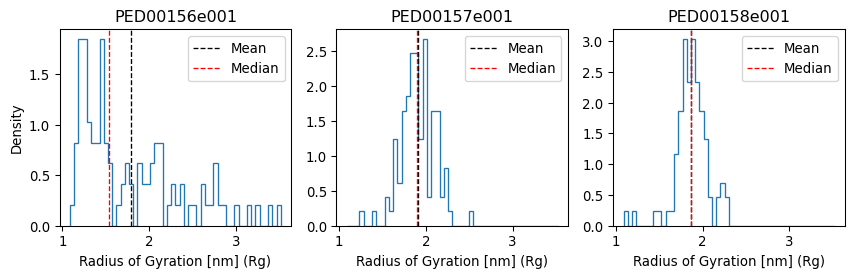

In [2]:
vis.radius_of_gyration(multiple_hist_ax=True , means=True, median=True)

<Axes: title={'center': 'Radius of Gyration'}, ylabel='Radius of Gyration [nm] (Rg)'>

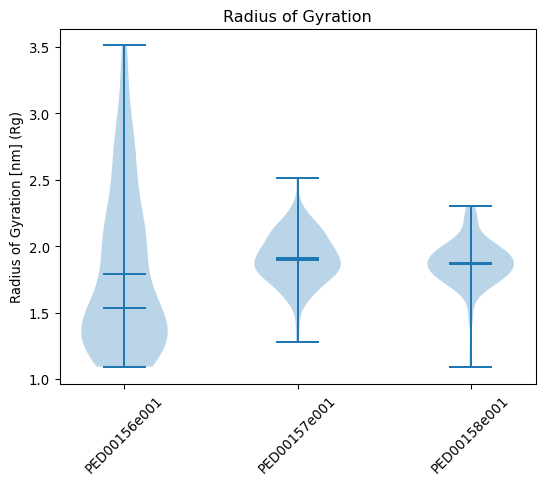

In [3]:
vis.radius_of_gyration(violin_plot=True, means=True, median=True)

#### Third step: Visualization and calculation of other global features 
- End to end distances
- Global SASA
- Asphericity 
- Prolateness
- Rg vs Asphericity  

Explanation on EE distances goes here..

<Axes: title={'center': 'End-to-End distances distribution'}, ylabel='End-to-End distance [nm]'>

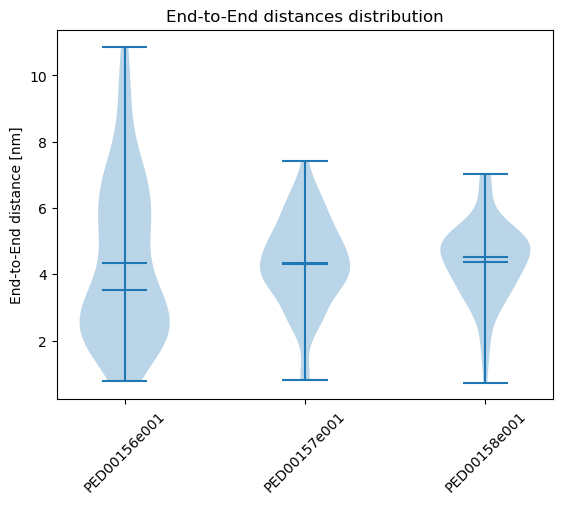

In [4]:
vis.end_to_end_distances()

Explanations on global SASA goes here...


<Axes: title={'center': 'SASA distribution over the ensembles'}, ylabel='SASA (nm$^2$)'>

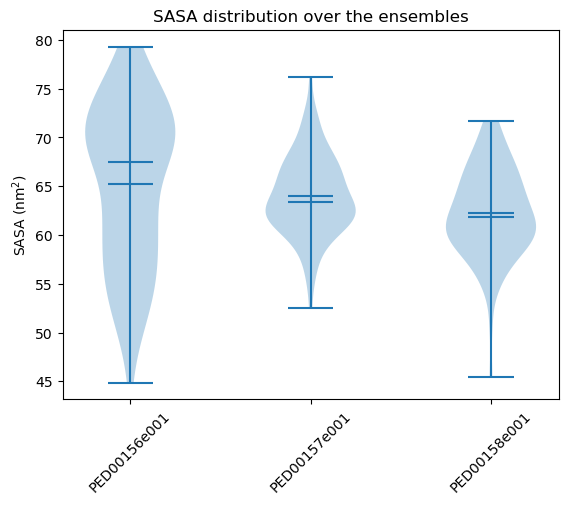

In [5]:
vis.ensemble_sasa()

Explanations on Asphericity goes here ....

<Axes: title={'center': 'Asphericity distribution'}, ylabel='Asphericity'>

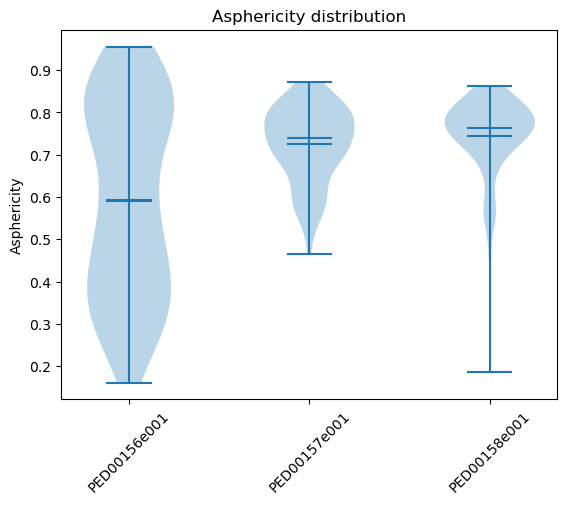

In [6]:
vis.asphericity()

Explanations on prolateness goes here ...

<Axes: title={'center': 'Prolateness distribution'}, ylabel='Prolateness'>

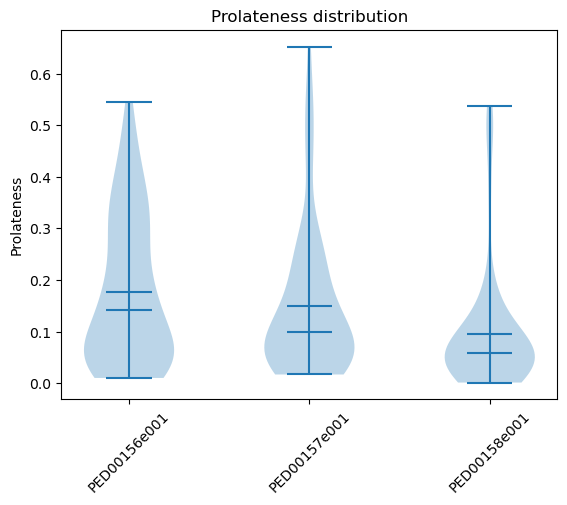

In [10]:
vis.prolateness(median=True, means=True)

Explanations on flory exponenct index goes here ...

In [15]:
v_values = analysis.get_features("flory_exponent")
for code in v_values:
    print(f"{code}: {v_values[code]:.4f}")


PED00156e001: 0.6002
PED00157e001: 0.5550
PED00158e001: 0.5729


Explanation for the relationshipd between Rg and asphericity goes here ...

Pearson coeff for PED00156e001 = 0.892
Pearson coeff for PED00157e001 = 0.357
Pearson coeff for PED00158e001 = 0.598


<Axes: xlabel='Radius of Gyration (Rg) [nm]', ylabel='Asphericity'>

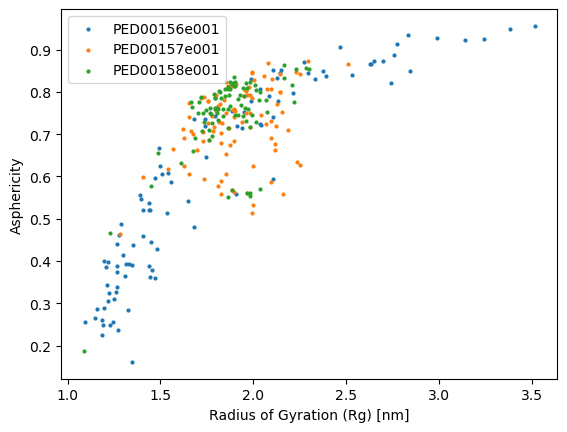

In [16]:
vis.rg_vs_asphericity()

### Local Analysis

<Axes: xlabel='Residue Index', ylabel='Site-specific flexibility parameter'>

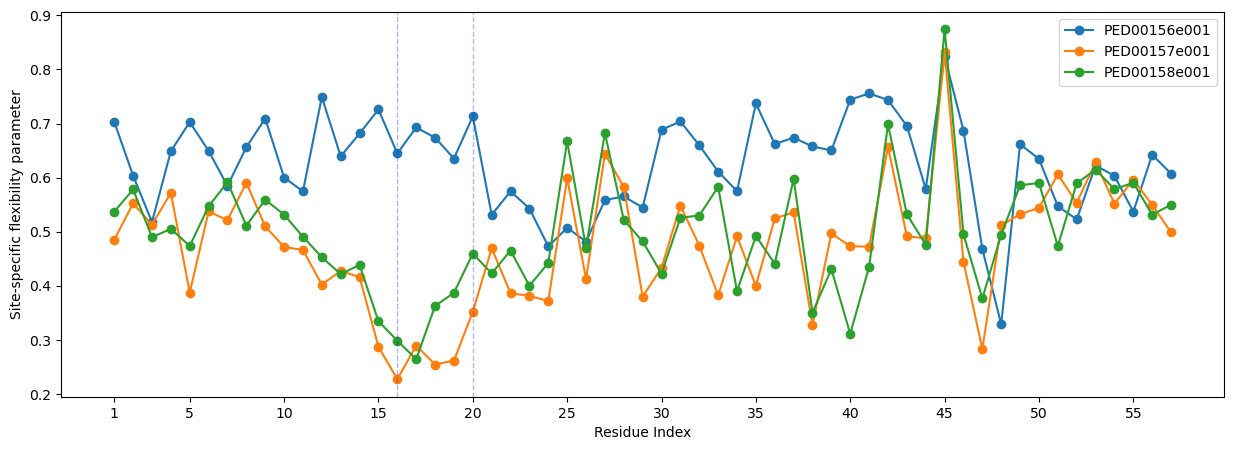

In [21]:
vis.ss_flexibility_parameter(pointer=[16,20])

<Axes: xlabel='Residue Index', ylabel='Site-specific order parameter'>

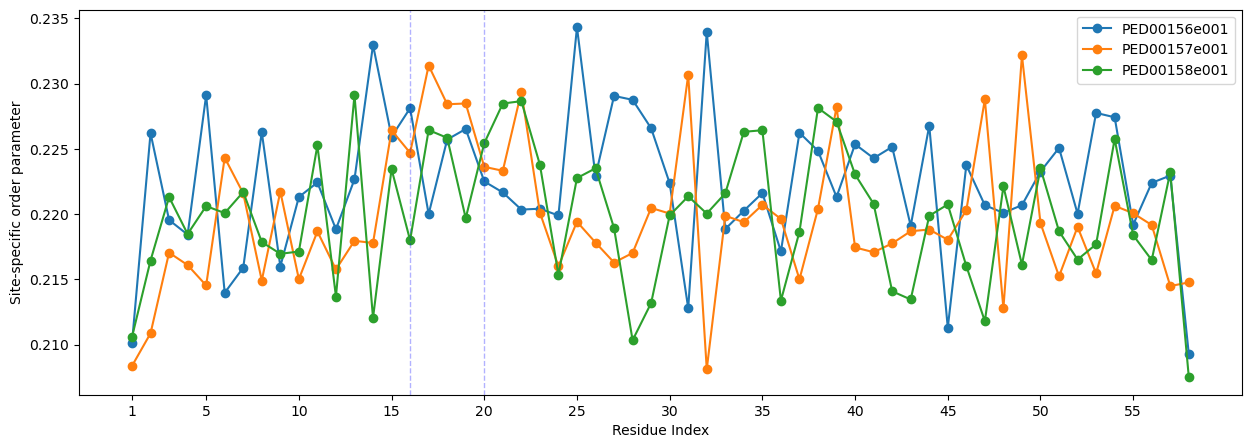

In [22]:
vis.ss_order_parameter(pointer=[16,20])

array([<Axes: title={'center': 'Ramachandran Plot for cluster PED00156e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00157e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00158e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>],
      dtype=object)

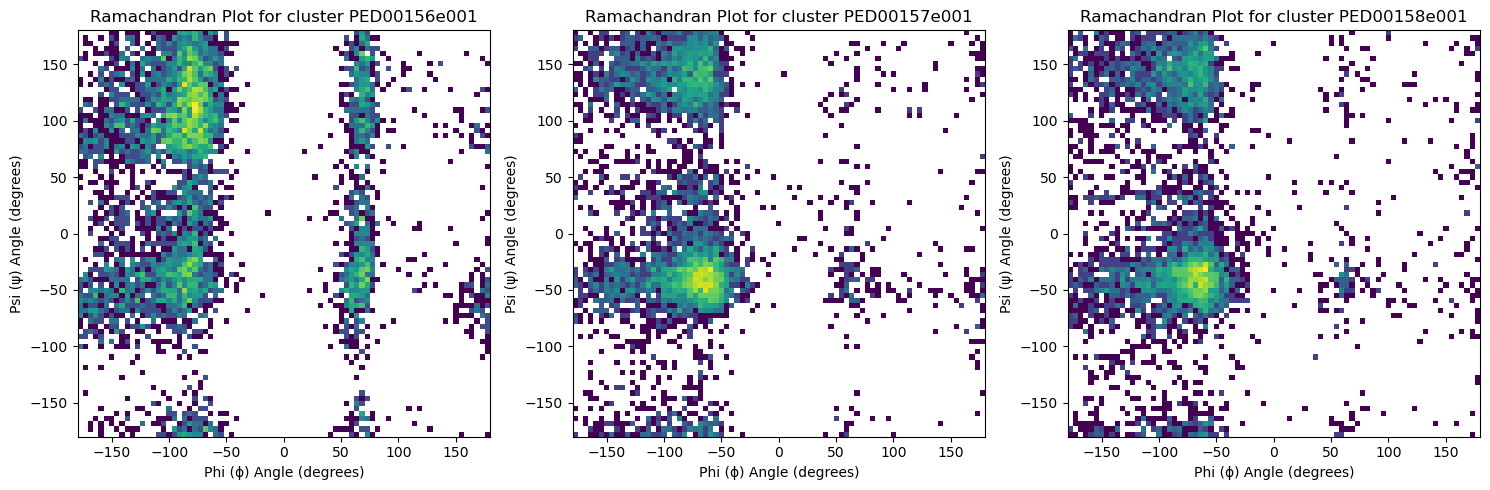

In [24]:
vis.ramachandran_plots()

<Axes: title={'center': 'Distribution of alpha angles'}, xlabel='angle [rad]', ylabel='Density'>

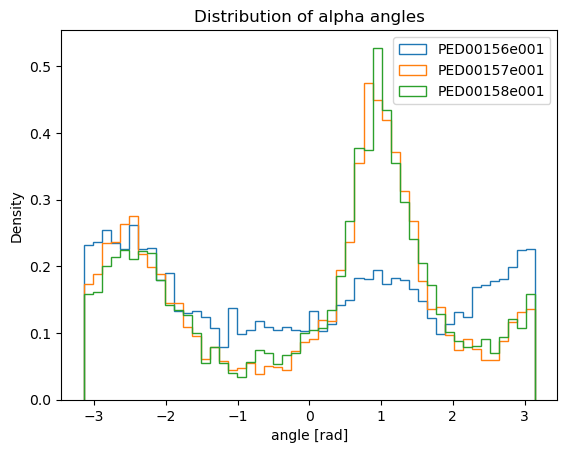

In [25]:
vis.alpha_angles()

<Axes: title={'center': 'Relative Content of C in Each Residue in the ensembles'}, xlabel='Residue Index', ylabel='Relative Content of Coil'>

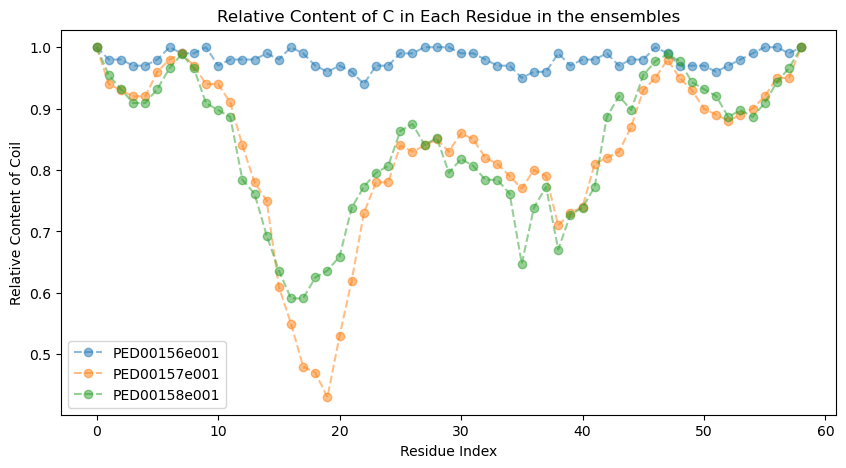

In [27]:
vis.relative_ss_content(dssp_code='C')